# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [5]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.shape

(130, 3)

__Question 1:__

__*Is the distribution of body temperatures normal?*__

    Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test 

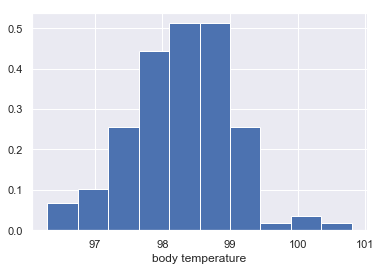

In [16]:
temp = df['temperature']
_ = plt.hist(temp, density=True)
_ = plt.xlabel('body temperature')
_ = plt.ylabel('')
plt.show()

The above histogram shows the data is not so normal. We need to do some for EDA.

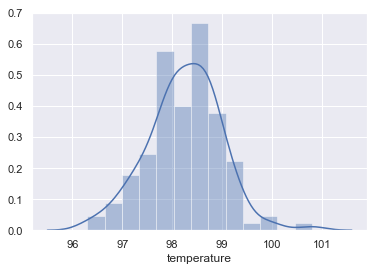

In [17]:
sns.distplot(temp, hist=True)

The above plot shows that the data is closer to normal than the first histogram showed.

In [20]:
stats.normaltest(temp)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

The normal test above shows that the p-value is 0.26 which is much more than 0.05. So we fail to reject null hypothesis. Thus the temperature data is normal. But let's do some more analysis.

In [28]:
# define empirical cumulative distribution function to plot 
# sample vs theoretical normal cumulative distributions
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

Sample mean is: 98.24923076923078


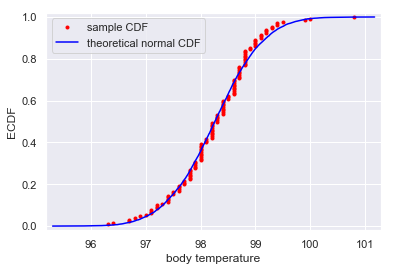

In [40]:
# mean and standard deviation of temperature from sample data.
mean_temp = np.mean(temp)
std_temp = np.std(temp)
print("Sample mean is:", mean_temp)
# Theoretical normal samples
theoretical_samples = np.random.normal(mean_temp, std_temp, size=10000)

# Compute ecdf for sample data
x,y = ecdf(temp)

# Compute ecdf for theoretical sample
x_theor, y_theor = ecdf(theoretical_samples)

# plot
_ = plt.plot(x, y, marker='.', linestyle='none', color='red')
_ = plt.plot(x_theor, y_theor, color='blue')
_ = plt.xlabel('body temperature')
_ = plt.ylabel('ECDF')
_ = plt.legend(['sample CDF', 'theoretical normal CDF'])
plt.margins(0.02)
plt.show()

Above plot shows that sample ECDF (red dots) closely follow the theoretical normal ECDF (blue solid line). This further supports the data being roughtly normally distributed. 

In [30]:
print('We expect to get 95% of data between', mean_temp - 1.96*std_temp, 'and', mean_temp + 1.96*std_temp)
print('We got 95% of data between', np.percentile(temp, [2.5, 97.5]))

We expect to get 95% of data between 96.8177295225769 and 99.68073201588466
We got 95% of data between [96.7225 99.4775]


The above analysis also proves that the temperature data is pretty close to normal distribution.

__Answer 1:__ Yes the distribution of body temperatures is normal.



__Question 2:__
__*Is the sample size large? Are the observations independent?*__

    Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply. 

In [33]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [34]:
df.shape

(130, 3)

__Answer 2:__
Central Limit Theorem requires sample size to be at least 30 and we have 130 observations. So we can say that the sample size is large enough to satisfy this condition.
For the samples to be independent (if sampled without replacement) if it is not more than 10% of the population. Definitely the sample is way less than 10% of population. Each person is different from other, so in this case we can assume that the temperature and heart_rate readings are independent.

__Question 3:__
Is the true population mean really 98.6 degrees F?

__Question 3.1:__ First, try a bootstrap hypothesis test.

__Question 3.2:__ Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

__Question 3.3:__ In this situation, is it appropriate to use the 𝑡 or 𝑧 statistic?

__Question 3.4:__ Now try using the other test. How is the result be different? Why? 

In [37]:
# Bootstrap replicate function
def bootstrap_replicate_1d(data, func):
    '''Generate bootstrap replicate of one dimensional data.'''
    bs_sample = np.random.choice(data, size=len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

95% confidence interval for bootstrap replicates is:  [98.12615385 98.37540385]


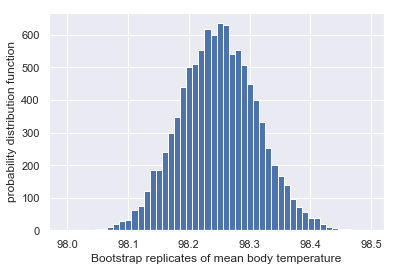

In [39]:
mean = 98.6

# take 10,000 bootstrap replicates of the mean
bs_replicates = draw_bs_reps(temp, np.mean, 10000)

# calculate 95% confidence interval
confidence_interval = np.percentile(bs_replicates, [2.5, 97.5])

print("95% confidence interval for bootstrap replicates is: ", confidence_interval)

# Let's try plotting
_ = plt.hist(bs_replicates, bins=50)
_ = plt.xlabel('Bootstrap replicates of mean body temperature')
_ = plt.ylabel('probability distribution function')
plt.show()

__Answer 3.1:__
The above analysis suggests that the probability of mean body temperature being 98.6 is very low.

__Answer 3.2:__
For this case we will use one-sample test because we are comparing mean value of one sample dataset with a one value. For two sample test we compare means of two different samples.

__Answer 3.3:__

H0: true mean population temperature = 98.6 F

Ha: true mean population temperature ≠ 98.6 F

Here we will use t-statistic because although we know the population mean temp, but we don't know the population standard deviation of the body temperature.


In [41]:
t, p = stats.ttest_1samp(temp, 98.6)
t

-5.4548232923645195

In [42]:
p

2.4106320415561276e-07

In [43]:
print("The t-statistic is %.2f with a p-value of %s" % (abs(t), p))

The t-statistic is 5.45 with a p-value of 2.4106320415561276e-07


The p-value is very low and it suggests that the probability of observing a human body temperature of 98.6 or larger given our null hypothesis is true, is extremely unlikely. Thus we can reject null hypothesis in favor of alternate hypothesis.

In [65]:
# trying z-statistic
mean_temp = np.mean(temp)
std_temp = np.std(temp)
s = std_temp/np.sqrt(len(temp))
z_statistic = ((mean_temp - 98.6)/s)

p = 1-stats.norm.cdf(abs(z_statistic))

print("The z-statistic is %.2f with a p-value of %f" % (abs(z_statistic), p))

The z-statistic is 5.48 with a p-value of 0.000000


__Answer 3.4:__ Both z and t tests are similar and both giving similar test statistic and extremely low p-value. Both suggest that it is unlikely that mean body temperature is equal to 98.6 F.

__Question 4:__ Draw a small sample of size 10 from the data and repeat both frequentist tests.

__Question 4.1:__ Which one is the correct one to use?
    
__Question 4.2:__ What do you notice? What does this tell you about the difference in application of the 𝑡 and 𝑧 statistic? 

In [72]:
# Draw a small sample of size 10
np.random.seed(42)
sample = np.random.choice(temp, size=10)
sample

array([98. , 98.8, 97.8, 97. , 97.7, 98.3, 98. , 97.9, 99. , 98. ])

In [73]:

# t-test is more appropriate to use for small sample size
t, p = stats.ttest_1samp(sample, 98.6)

# z-test
mean = np.mean(sample)
stdev = np.std(sample)
ss = stdev/np.sqrt(len(sample))
z = (mean - 98.6)/ss
pz = 1 - stats.norm.cdf(abs(z))
print("The t-statistic is %.2f with a p-value of %s" % (abs(t), p))
print("The z-statistic is %.2f with a p-value of %f" % (abs(z), pz))

The t-statistic is 3.09 with a p-value of 0.012857704604809363
The z-statistic is 3.26 with a p-value of 0.000556


__Answer 4.1:__ From above analysis, both tests reach the same conclusion. So in this case both seem to be OK to use.

__Answer 4.2:__ I didn't notice anything striking. The only thing is p value from ztest is much lower, hence it would still be significant if significance level was 0.01, where as ttest would fail.

__Question 5:__ At what temperature should we consider someone's temperature to be "abnormal"?

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 

In [78]:
mean = 98.6

# take 10,000 bootstrap replicates of the mean
bs_replicates = draw_bs_reps(temp, np.mean, 10000)

# calculate 95% confidence interval
confidence_interval = np.percentile(bs_replicates, [2.5, 97.5])

# Actually confidence interval = mean +/- margin of error, so
margin_of_error = np.mean(temp) - confidence_interval[0]

print("95% confidence interval for bootstrap replicates is: ", confidence_interval)
print("99% confidence interval for bootstrap replicates is: ", np.percentile(bs_replicates, [0.5, 99.5]))
print("Margin of error for 95% CI is: ", margin_of_error)
print("Margin of error for 99% CI is: ", (np.mean(temp) - np.percentile(bs_replicates, [0.5, 99.5])[0]))

95% confidence interval for bootstrap replicates is:  [98.12692308 98.37538462]
99% confidence interval for bootstrap replicates is:  [98.08538077 98.41846154]
Margin of error for 95% CI is:  0.12230769230770022
Margin of error for 99% CI is:  0.1638500000000107


In [75]:
# Now by frequentist approach
t, p = stats.ttest_1samp(temp, 98.6)
mean_temp = np.mean(temp)
std_temp = np.std(temp)

se = std_temp/np.sqrt(len(temp))

z = (mean_temp - 98.6)/se
pz = 1 - stats.norm.cdf(abs(z))

print("The t-statistic is %.2f with a p-value of %s" % (abs(t), p))
print("The z-statistic is %.2f with a p-value of %f" % (abs(z), pz))

The t-statistic is 5.45 with a p-value of 2.4106320415561276e-07
The z-statistic is 5.48 with a p-value of 0.000000


__Answer 5:__ Both bootstrap and frequentist approaches suggest that probability of getting mean body temperature of 98.6 is almost none. Thus we reject null hypothesis in favor of alternate hypothesis that mean body temperature is not 98.6.
So based on these analyses, body temperatures below 98.12 or above 98.38 should be considered abnormal.

__Question 6:__ Is there a significant difference between males and females in normal temperature?

    What testing approach did you use and why?
    Write a story with your conclusion in the context of the original problem. 

I would use two-sample hypothesis testing approach. But first let's do some EDA.

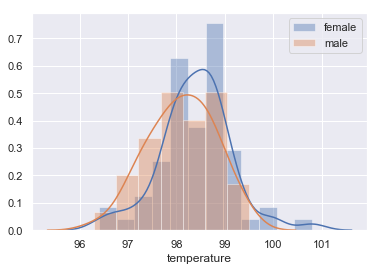

In [83]:
fbt = df.temperature[df.gender == 'F']
mbt = df.temperature[df.gender == 'M']

sns.distplot(fbt, hist=True, label='female')
sns.distplot(mbt, hist=True, label='male')
plt.legend()

__*H0: male mean body temperature = female mean body temperature*__

__*Ha: male mean body temperature ≠ female mean body temperature*__

significance level = 0.05

In [84]:
t, p = stats.ttest_ind(fbt, mbt)
print("The t-statistic is %.2f with a p-value of %s" % (abs(t), p))

The t-statistic is 2.29 with a p-value of 0.02393188312239561


__Answer 6:__ Since the p value (0.024) is less than the significance level 0.05, we reject null hypothesis. Thus male and female mean body temperatures are different.

__Conclusion__ 

It is widely accepted that the mean human body temperature is 98.6 degrees Fahrenheit. However, with my analysis with the data provided, I conclude that mean body temperature is highly unlikely to be 98.6. Furthermore, mean body temperatures of males and females are also significantly different.